<a href="https://colab.research.google.com/github/prathammehta16/ML_University_Course/blob/main/20IT068_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#20IT068

#Practical 5

**Why you want to apply classification on selected dataset? Discuss full story behind dataset.**

The dataset contains the results of a chemical analysis of wines grown in a specific region in Italy. The goal of the dataset is to classify the wines into three different categories based on their chemical composition.

There are 13 different features in the dataset, including measurements of alcohol content, malic acid, ash, alkalinity of ash, magnesium, total phenols, flavonoids, nonflavonoid phenols, proanthocyanins, color intensity, hue, and od280/od315 of diluted wines. The target variable is the cultivar, which represents the three different classes of wine in the dataset.

In [57]:
from sklearn import datasets
import pandas as pd
dataset = datasets.load_wine()

**How many total observations in data?**

There are total of 178 rows and 13 columns present in the data.

In [16]:
dataset['data'].shape         

(178, 13)

**How many independent variables?**

There are 13 independent variables.

In [24]:
print(dataset.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


**Which is dependent variable?**

There are 3 dependent variables.

In [27]:
print(dataset.target_names)

['class_0' 'class_1' 'class_2']


In [30]:
X = dataset['data']
y = dataset['target']
df = pd.DataFrame(X, columns=dataset['feature_names'])
df['target'] = y

In [32]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Which are most useful variable in classification? Prove using correlation.**

Below we can see that 'flavanoids' is the most useful variable for classification. 

In [33]:
corr = df.corr()
corr_with_target = abs(corr['target'])
print(corr_with_target)

alcohol                         0.328222
malic_acid                      0.437776
ash                             0.049643
alcalinity_of_ash               0.517859
magnesium                       0.209179
total_phenols                   0.719163
flavanoids                      0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                 0.499130
color_intensity                 0.265668
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
target                          1.000000
Name: target, dtype: float64


#Implement KNN using sklearn api.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)
ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [42]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


#Implement code to find best value of k by splitting data in train and test.

Minimum error:- 0.022222222222222223 at K = 2


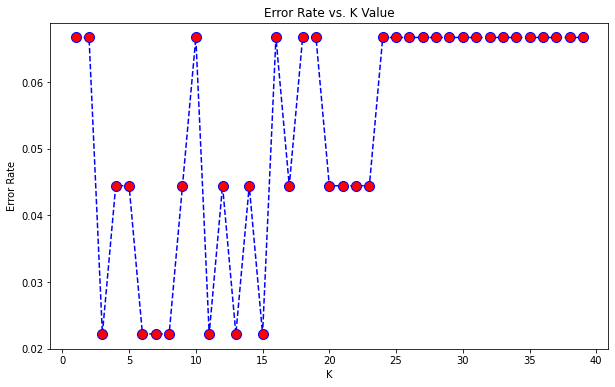

In [46]:
import numpy as np
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

**Quantify goodness of your model and discuss steps taken for improvement.**

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9777777777777777


array([[16,  0,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

In [55]:
df1 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df1

,Real Values,Predicted Values
0,0,0
1,2,2
2,1,1
3,0,0
4,1,1
5,1,1
6,0,0
7,2,2
8,1,1
9,1,1


**Can we use KNN for regression also? Why / Why not?**

Yes, KNN can also be used for regression tasks.

In regression tasks, the goal is to predict a continuous target variable. In KNN regression, the algorithm predicts the target variable for a new instance by computing the average or weighted average of the target variable of its k nearest neighbors.

To find the k nearest neighbors, the algorithm calculates the distance between the new instance and all the instances in the training set using a distance metric such as Euclidean distance or Manhattan distance. The k instances in the training set with the shortest distances to the new instance are then used to predict the target variable of the new instance.

**Discuss drawbacks of algorithms such as KNN.**

Here are some drawbacks of KNN:

1. High computational cost: KNN can be computationally expensive, particularly for large datasets or when the number of features is high. For each new instance, the algorithm needs to calculate the distances to all the instances in the training set, which can be time-consuming.

2. Sensitivity to irrelevant features: KNN considers all the features in the dataset when calculating distances between instances. This can be problematic if some features are irrelevant or noisy, as they can introduce bias into the algorithm.

3. Sensitivity to the choice of k: The choice of k, the number of nearest neighbors to consider, can have a significant impact on the performance of the algorithm. A smaller k value can lead to overfitting, while a larger k value can lead to underfitting.

4. Imbalanced datasets: KNN is sensitive to imbalanced datasets, where the number of instances in each class is not equal. In these cases, the algorithm may assign too much weight to the majority class and not be able to distinguish the minority class effectively.

5. Curse of dimensionality: As the number of features in the dataset increases, the distance between instances becomes less meaningful, and KNN can become less effective. This is known as the curse of dimensionality and can lead to overfitting and reduced performance.